In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
# NOT USED
# import keras_tuner as kt

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
#  for train_test_split() method
import sklearn as sklearn

In [7]:
#  for train_test_split() method
from sklearn.model_selection import train_test_split

In [8]:
sklearn.__version__

'1.0.1'

In [9]:
pd.__version__

'1.3.3'

In [10]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter=",")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_filename = "Resampled_myData_Volume_Only.csv"

x_1, y_1 = readucr(root_filename )


In [11]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter=",")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_filename = "Resampled_myData_Flow_Only.csv"

x_2, y_2 = readucr(root_filename )

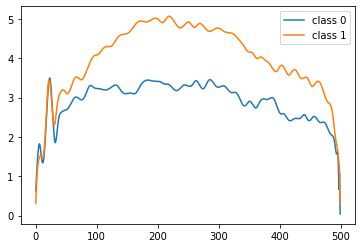

In [12]:
classes = np.unique(y_1)

plt.figure()
for c in classes:
    c_x_train2 = x_2[y_2 == c]
    plt.plot(c_x_train2[13], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [13]:
classes

array([0, 1])

In [14]:
x_all = np.concatenate((x_1[...,np.newaxis],x_2[...,np.newaxis]),axis=2)

In [15]:
num_classes = len(np.unique(y_1))
print(num_classes)

2


In [16]:
idx = np.random.permutation(len(x_all))
x_all = x_all[idx]
y_1 = y_1[idx]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x_all, y_1, test_size=0.33, random_state=42)

In [18]:
import pydot
import graphviz

In [19]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=30, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=30, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=30, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)

2022-01-05 12:32:38.666272: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 2)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 64)           3904      
_________________________________________________________________
batch_normalization (BatchNo (None, 500, 64)           256       
_________________________________________________________________
re_lu (ReLU)                 (None, 500, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 64)           122944    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500, 64)           256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 500, 64)           0     

In [25]:
epochs = 100
batch_size = 3

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    )#,
    #keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/100
11/11 [==============================] - 2s 89ms/step - loss: 0.4888 - sparse_categorical_accuracy: 0.7576 - val_loss: 0.2116 - val_sparse_categorical_accuracy: 0.8667
Epoch 2/100
11/11 [==============================] - 1s 74ms/step - loss: 0.2682 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.3924 - val_sparse_categorical_accuracy: 0.8000
Epoch 3/100
11/11 [==============================] - 1s 66ms/step - loss: 0.5134 - sparse_categorical_accuracy: 0.7273 - val_loss: 0.2747 - val_sparse_categorical_accuracy: 0.8667
Epoch 4/100
11/11 [==============================] - 1s 86ms/step - loss: 0.3181 - sparse_categorical_accuracy: 0.8485 - val_loss: 1.0853 - val_sparse_categorical_accuracy: 0.8000
Epoch 5/100
11/11 [==============================] - 1s 114ms/step - loss: 0.4739 - sparse_categorical_accuracy: 0.8182 - val_loss: 1.0327 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/100
11/11 [==============================] - 2s 167ms/step - loss: 0.3301 - sparse_categori

In [26]:
#Test

model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, Y_test)


print("Test accuracy", test_acc)
print("Test loss", test_loss)

1/1 [==============================] - 0s 237ms/step - loss: 0.4890 - sparse_categorical_accuracy: 0.8000
Test accuracy 0.800000011920929
Test loss 0.4890285134315491


In [27]:
print(np.concatenate((np.around(model.predict(X_test),decimals=2),Y_test.reshape(len(Y_test),1)),axis=1))


[[0.98000002 0.02       1.        ]
 [0.95999998 0.04       0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         1.        ]
 [0.66000003 0.34       1.        ]
 [0.97000003 0.03       0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         1.        ]
 [1.         0.         0.        ]
 [0.83999997 0.16       1.        ]
 [0.94       0.06       0.        ]
 [0.95999998 0.04       0.        ]
 [0.95999998 0.04       0.        ]
 [0.97000003 0.03       0.        ]
 [0.86000001 0.14       0.        ]
 [0.         1.         1.        ]
 [0.15000001 0.85000002 1.        ]
 [0.02       0.98000002 1.        ]
 [0.2        0.80000001 1.        ]
 [0.73000002 0.27000001 1.        ]
 [0.95999998 0.04       0.        ]
 [0.93000001 0.07       1.        ]
 [0.34       0.66000003 1.        ]]


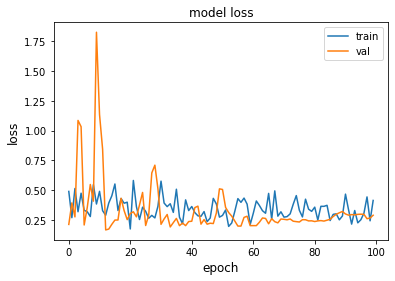

In [28]:
metric = "loss"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# further reading on diagnosing learning curve: 
# https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/